tmax,tsteps 0.1 0.00016 625


<IPython.core.display.Javascript object>


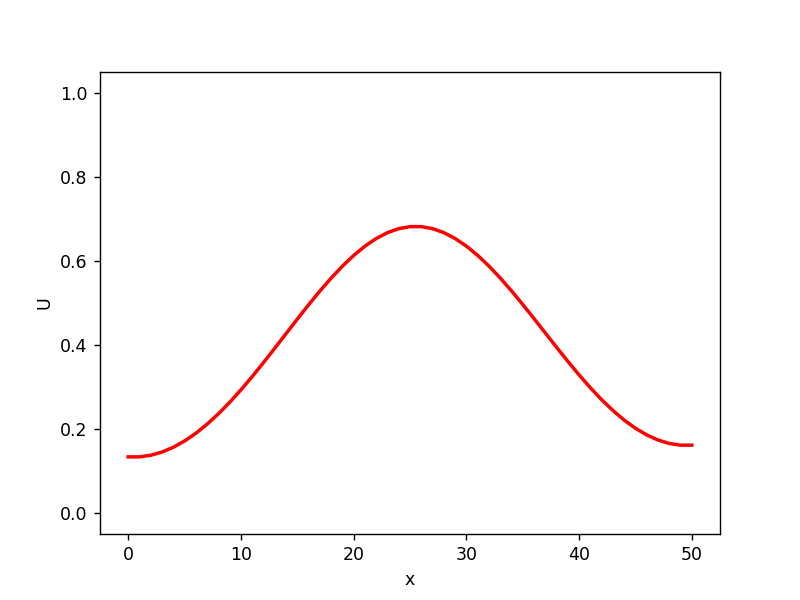

In [11]:
## 1D Heat Equation

from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import ArtistAnimation 

mu=1.0 #diffusivity
Lx = 1 #length[m]
t_max = 0.1

Nx = 51
deltax = Lx/(Nx-1)
deltat=0.4*(deltax**2)   #Maximum time step that satisfies the stability condition
Nt = int(t_max/deltat)
dtdx2=deltat/(deltax**2)

print("tmax,tsteps", t_max, deltat,Nt)

u =  np.zeros([Nx,Nt])


#Initial conditions
t=0
for i in range (Nx) :
    if ((i>.3*Nx) and (i < 0.7*Nx)) :
        u[i,0]=1.0
    else :  
        u[i,0] = 0.0

#for i in range(1,Nx-1): # u[:,1]settings of
#    u[i,1]  = u[i,0]

for j in range(0,Nt-1):
    for i in range(1,Nx-1):
        u[i,j+1] = u[i,j]+mu*dtdx2*(u[i+1,j]-2*u[i,j]+u[i-1,j])
#boundary condition
   # u[0,:] = 0
   # u[-1,:] = 0        
    u[0,j+1]=u[1,j+1]
    u[Nx-1,j+1]=u[Nx-2,j+1]
        
        
x=list(range(Nx))
y=list(range(Nt))

X, Y = np.meshgrid(x,y)

def functz(u):
    z=u[X,Y]
    return z
"""
Z = functz(u)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z, color='r')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('U')

plt.show()

"""
%matplotlib nbagg 
#from matplotlib.animation import ArtistAnimation #Import methods for creating animations

fig = plt.figure()

anim = [] #A list for storing the data of the para-para diagram drawn for animation

for i in range(0,Nt-1):
    U=list(u[:,i])
    x=list(range(Nx))
  #  if i % int(Nt*0.01) ==0: 
    im=plt.plot(x,U, '-', color='red',markersize=10, linewidth = 2, aa=True)
    anim.append(im)

anim = ArtistAnimation(fig, anim) #Animation creation
plt.xlabel('x')
plt.ylabel('U')

fig.show()

